In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


In [5]:
IMAGE_SIZE = 256
CHANELS = 3

train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10,

)

train_generator = train_datagen.flow_from_directory(
    'E:/Deep Learning/Potato Disease Classification/dataset/train',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)



Found 1506 images belonging to 3 classes.


In [18]:
validation_datagen  = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10,

)

validation_generator = train_datagen.flow_from_directory(
    'E:/Deep Learning/Potato Disease Classification/dataset/val',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)


Found 215 images belonging to 3 classes.


In [17]:
test_datagen  = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10,

)

test_generator = train_datagen.flow_from_directory(
    'E:/Deep Learning/Potato Disease Classification/dataset/test',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)


Found 431 images belonging to 3 classes.


In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANELS)
n_classes = 3

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [15]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch = 47,
    epochs = 20,
    batch_size = 32,
    validation_data = validation_datagen,
    validation_steps = 6,
    verbose = 1,
)

Epoch 1/20
47/47 [==============================] - 17s 274ms/step - loss: 0.8988 - accuracy: 0.5326 - val_loss: 0.8355 - val_accuracy: 0.5104
Epoch 2/20
47/47 [==============================] - 12s 261ms/step - loss: 0.6986 - accuracy: 0.6784 - val_loss: 0.4923 - val_accuracy: 0.8073
Epoch 3/20
47/47 [==============================] - 13s 271ms/step - loss: 0.4022 - accuracy: 0.8270 - val_loss: 0.3820 - val_accuracy: 0.8438
Epoch 4/20
47/47 [==============================] - 12s 256ms/step - loss: 0.2996 - accuracy: 0.8752 - val_loss: 0.3161 - val_accuracy: 0.8542
Epoch 5/20
47/47 [==============================] - 12s 255ms/step - loss: 0.2823 - accuracy: 0.8813 - val_loss: 0.2942 - val_accuracy: 0.8646
Epoch 6/20
47/47 [==============================] - 12s 248ms/step - loss: 0.2424 - accuracy: 0.9043 - val_loss: 0.2426 - val_accuracy: 0.8750
Epoch 7/20
47/47 [==============================] - 12s 251ms/step - loss: 0.2408 - accuracy: 0.9091 - val_loss: 0.1951 - val_accuracy: 0.9375

In [19]:
scores = model.evaluate(test_generator)
scores

14/14 [==============================] - 3s 218ms/step - loss: 0.2035 - accuracy: 0.9443


[0.20347413420677185, 0.9443155527114868]

In [20]:
history.params


{'verbose': 1, 'epochs': 20, 'steps': 47}

In [23]:
type(history.history['loss'])

list

In [24]:

len(history.history['loss'])

20

In [25]:
history.history['loss'][:5]

[0.8988330960273743,
 0.6985890865325928,
 0.40217000246047974,
 0.2996470332145691,
 0.28225964307785034]

In [26]:

[0.9230136275291443,
 0.7241908311843872,
 0.47826799750328064,
 0.29314613342285156,
 0.5106303691864014]

[0.9230136275291443,
 0.7241908311843872,
 0.47826799750328064,
 0.29314613342285156,
 0.5106303691864014]

In [27]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:

val_acc

[0.5104166865348816,
 0.8072916865348816,
 0.84375,
 0.8541666865348816,
 0.8645833134651184,
 0.875,
 0.9375,
 0.8385416865348816,
 0.90625,
 0.9270833134651184,
 0.9322916865348816,
 0.6458333134651184,
 0.9166666865348816,
 0.9583333134651184,
 0.9375,
 0.9375,
 0.9322916865348816,
 0.953125,
 0.9583333134651184,
 0.9479166865348816]

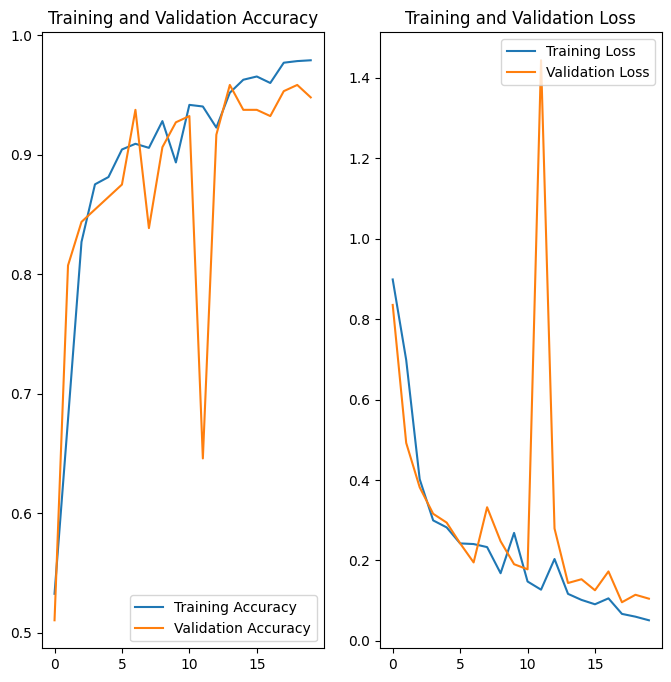

In [29]:

EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
model.save("../potatoes.h5")